# Ejercicios Pair Programming 
## Lección 5 - Normalización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [78]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv("supermercado_limpio.csv", index_col=0)

In [80]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,3,2,7


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste.

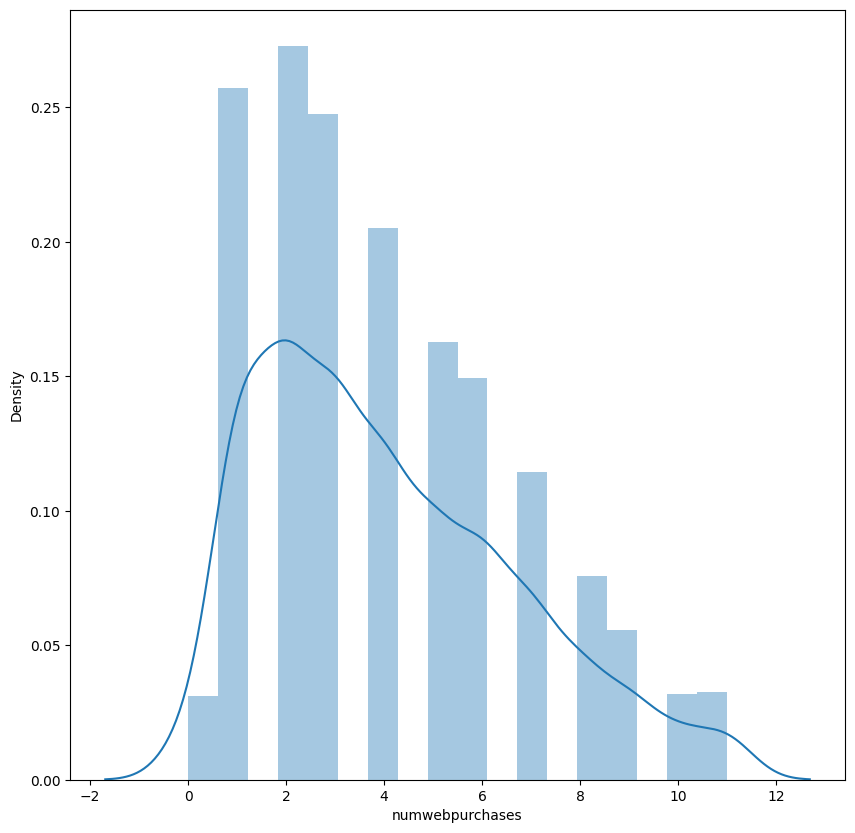

In [81]:
# lo podemos hacer con un displot
sns.distplot(df["numwebpurchases"]);

Como vemos que nuestra variable respuesta no presenta una distribución normal tendremos que empezar a realizar la normalización. Por la forma que presenta la gráfica consideramos que nuestra primera opción es probar la normalización "raíz cuadrada".

In [82]:
stats.shapiro(df["numwebpurchases"])

ShapiroResult(statistic=0.9306982755661011, pvalue=8.496315181302744e-31)

Confirmamos de forma analítica con el Test Shapiro que no presenta una distribución normal.

#### 1.- Raíz Cuadrada - Normalización

In [83]:
df["numwebpurchases_raiz"] = df["numwebpurchases"].apply(lambda x: math.sqrt(x))

In [84]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_raiz
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1,2.000000
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5,2.645751
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,5,2,1.732051
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,1,2,7,1.000000
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,3,2,7,1.732051


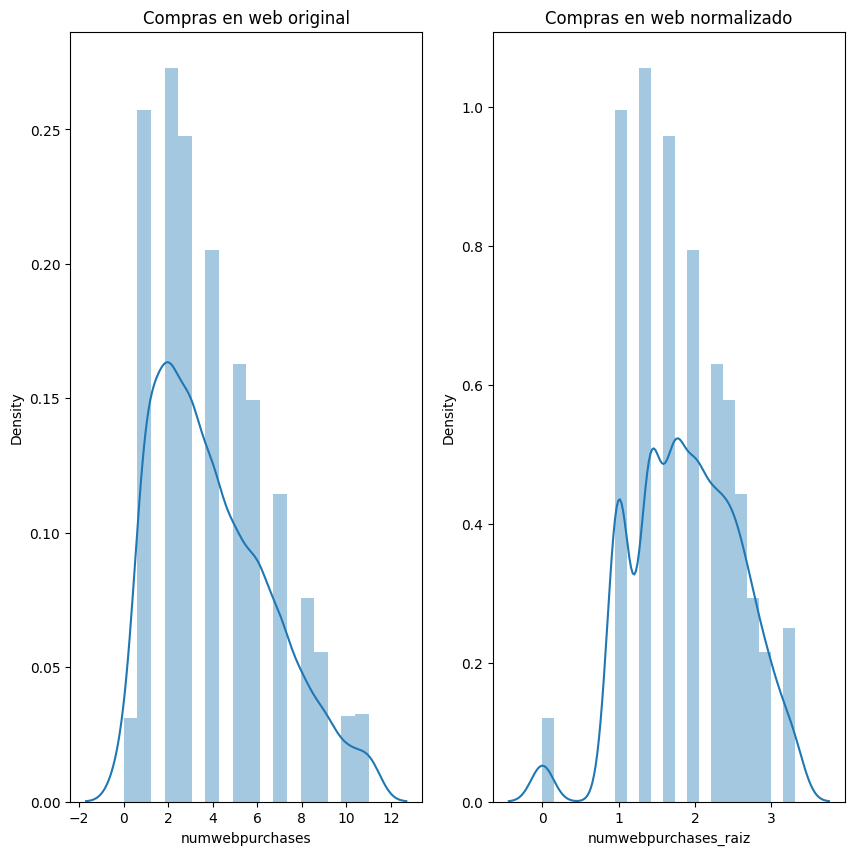

In [85]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

axes[0].set_title("Compras en web original")
axes[1].set_title("Compras en web normalizado")

sns.distplot(df["numwebpurchases"] ,ax = axes[0])
sns.distplot(df["numwebpurchases_raiz"], ax = axes[1]);

Gráficamente vemos que la distribución de nuestra variable respuesta está mas centrada pero en cuanto a la curva la visualizamos más deformada, es decir, no presenta una distribución normal.

In [86]:
stats.shapiro(df["numwebpurchases_raiz"])

ShapiroResult(statistic=0.965408980846405, pvalue=1.444836360800244e-22)

Comprobamos de forma analítica que el valor sigue siendo inferior a 0.05, por lo tanto nuestros datos no son normales.

Seguimos intentando normalizar nuestra variable respuesta con el método boxcox()

#### 2.- Boxcox - Normalización

In [87]:
df["numwebpurchases_box"], lambda_ajustada = stats.boxcox(df["numwebpurchases"])

ValueError: Data must be positive.

Al intentar realizar el método "Boxcox" nos aparece el error "Data must be positive" que significa que nuestra variable respuesta no puede tener valores negativos o igual a 0.

In [88]:
# Comprobamos los valores de nuestra variable respuesta para ver si tenemos valores iguales a 0 o negativos
df["numwebpurchases"].value_counts()

2     367
1     346
3     333
4     276
5     219
6     201
7     154
8     102
9      75
11     44
10     43
0      42
Name: numwebpurchases, dtype: int64

Vemos que tenemos 42 valores iguales a 0, por lo que hemos decidido sumarle una constante a todos los valores (no nos afecta en nuestro análisis ya que se modifican todos de la misma manera y lo tendremos en cuenta a la hora de sacar las conclusiones finales).

No nos planteamos eliminarlos porque son importantes en nuestro estudio de predicción.

In [89]:
# Realizamos la suma de la constante y guardamos el resultado en una nueva columna
df["numwebpurchases_modificado"] = df["numwebpurchases"] + 1

In [90]:
# Comprobamos en nuestra nueva columna que los valores han sido modificados, es decir, todos han aumentado en uno su valor.
df["numwebpurchases_modificado"].value_counts()

3     367
2     346
4     333
5     276
6     219
7     201
8     154
9     102
10     75
12     44
11     43
1      42
Name: numwebpurchases_modificado, dtype: int64

In [91]:
df["numwebpurchases_box"], lambda_ajustada = stats.boxcox(df["numwebpurchases_modificado"])

In [92]:
lambda_ajustada

0.2395649202280334

In [93]:
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_raiz,numwebpurchases_modificado,numwebpurchases_box
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1,2.000000,5,1.963746
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5,2.645751,8,2.695271


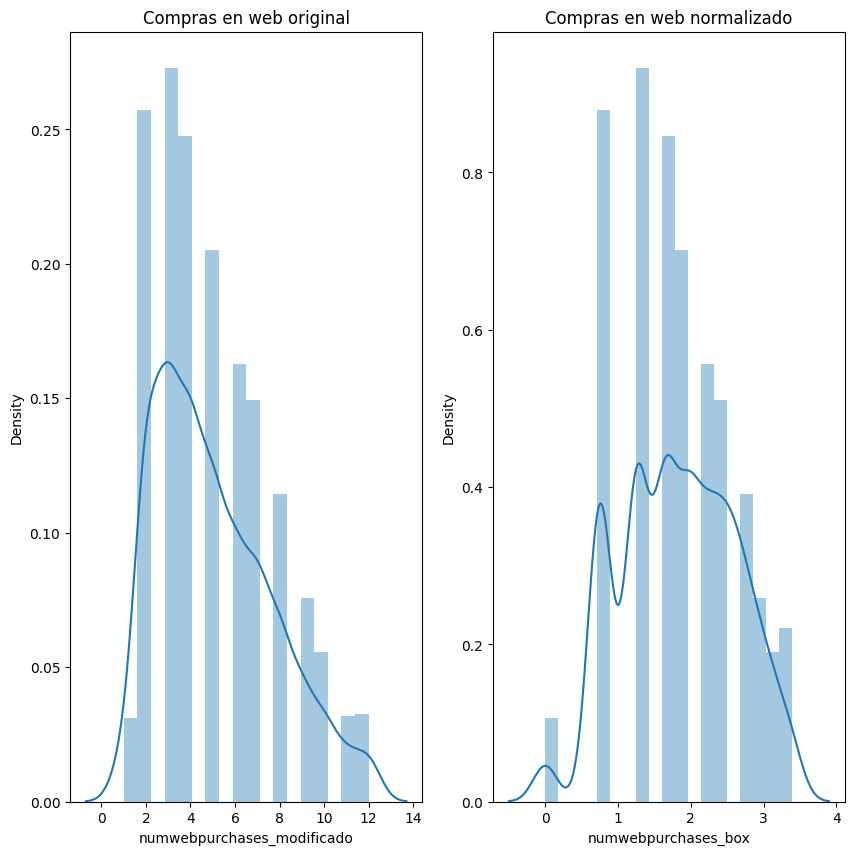

In [94]:
fig, axes = plt.subplots(1, 2, figsize = (10,10))

axes[0].set_title("Compras en web original")
axes[1].set_title("Compras en web normalizado")

sns.distplot(df["numwebpurchases_modificado"] ,ax = axes[0])
sns.distplot(df["numwebpurchases_box"], ax = axes[1]);

Gráficamente vemos que la distribución de nuestra variable respuesta está mas centrada pero en cuanto a la curva la visualizamos más deformada, es decir, no presenta una distribución normal.

In [95]:
stats.shapiro(df["numwebpurchases_box"])

ShapiroResult(statistic=0.9645720720291138, pvalue=7.927554168467793e-23)

Seguimos intentando normalizar nuestra variable respuesta con el método Sklearn MinMaxScaller

Comprobamos de forma analítica que el valor sigue siendo inferior a 0.05, por lo tanto nuestros datos no son normales.

### 3.- Sklearn MinMaxScaller

In [96]:
#  Inicializamos el método creando la variable "minmax_web"
minmax_web = MinMaxScaler()

In [97]:
#  Ajustamos el modelo Sklearn MinMaxScaller a nuestra variable respuesta
minmax_web.fit(df[["numwebpurchases"]])

MinMaxScaler()

In [98]:
# Realizamos la transformación de los datos de la variable respuesta
web_normalizadas = minmax_web.transform(df[["numwebpurchases"]])

In [99]:
# Verificamos el mínimo de nuestra variable. 
web_normalizadas.min(axis=0)

array([0.])

In [100]:
# Verificamos el máximo de nuestra variable.
web_normalizadas.max(axis=0)

array([1.])

In [101]:
# Crearemos un dataframe del array devuelto por el método. Vemos que los valores están entre el 0-1, que es como deben estar.

numericas_minmax = pd.DataFrame(web_normalizadas, columns = ["numwebpurchases_sklearn"])
numericas_minmax.head(2)

,numwebpurchases_sklearn
0,0.363636
1,0.636364


In [102]:
# Añadimos la nueva columna a nuestro dataframe
df["numwebpurchases_sklearn"] = numericas_minmax
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_raiz,numwebpurchases_modificado,numwebpurchases_box,numwebpurchases_sklearn
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1,2.000000,5,1.963746,0.363636
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5,2.645751,8,2.695271,0.636364


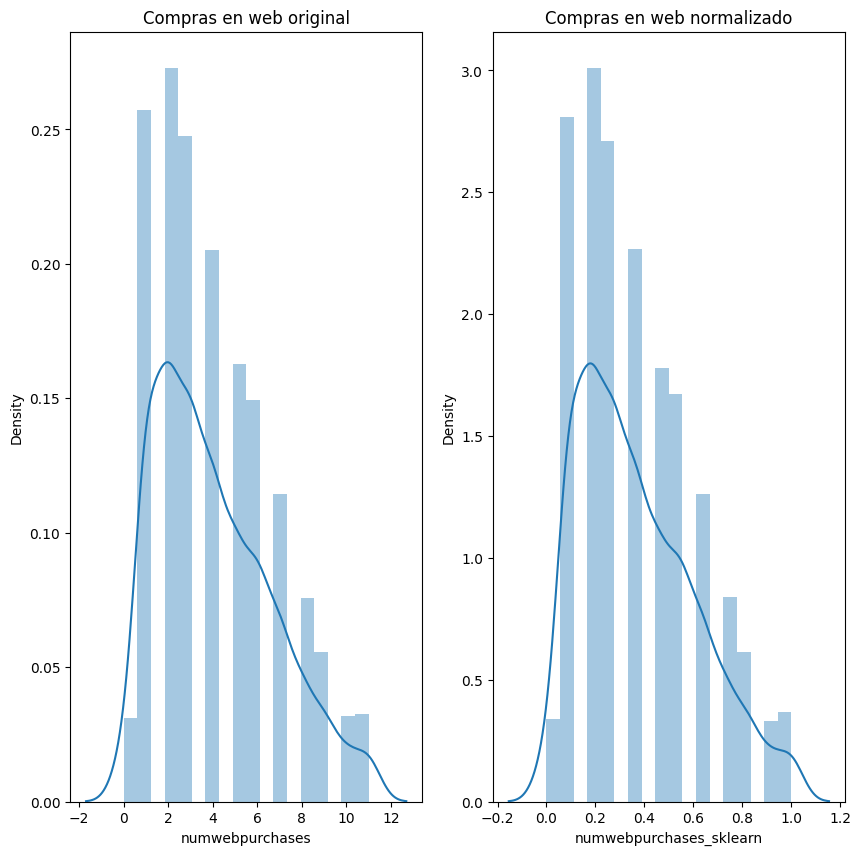

In [103]:
# Visualizamos la distribución de la variable respuesta original y la normalizada por Sklearn.
fig, axes = plt.subplots(1, 2, figsize = (10,10))

axes[0].set_title("Compras en web original")
axes[1].set_title("Compras en web normalizado")

sns.distplot(df["numwebpurchases"] ,ax = axes[0])
sns.distplot(df["numwebpurchases_sklearn"], ax = axes[1]);

Gráficamente no vemos una clara diferencia entre la original y la modificada, es decir, visualmente no ha habido normalización.
Comprobaremos con el Test de Saphiro tanto en la variable respuesta original como en la modificada si analíticamente ha habido alguna modificación que gráficamente no apreciamos.

In [104]:
stats.shapiro(df["numwebpurchases"])

ShapiroResult(statistic=0.9306982755661011, pvalue=8.496315181302744e-31)

In [105]:
stats.shapiro(df["numwebpurchases_sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

Comparando los p-values del Test de Saphiro, vemos claramente que nuestro p-values de la variable respuesta normalizada por Sklearn es superior a 0.05, por lo tanto, nuestra variable respuesta se ha normalizado.

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [106]:
# Realizamos un head() para ver las columnas que se nos han quedado en el dataframe y ver cuales podemos eliminar para seguir con nuestro análisis.
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_raiz,numwebpurchases_modificado,numwebpurchases_box,numwebpurchases_sklearn
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,4,6,1,2.000000,5,1.963746,0.363636
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,7,5,2.645751,8,2.695271,0.636364
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,3,5,2,1.732051,4,1.644242,0.272727
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,1,2,7,1.000000,2,0.754019,0.090909
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,3,2,7,1.732051,4,1.644242,0.272727


In [107]:
df.drop(["numwebpurchases","numwebpurchases_raiz","numwebpurchases_modificado","numwebpurchases_box"], axis = 1, inplace = True)

In [108]:
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,numdealspurchases,numstorepurchases,numwebvisitsmonth,numwebpurchases_sklearn
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,1,6,1,0.363636
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,1,7,5,0.636364
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,1,5,2,0.272727
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,1,2,7,0.090909
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,2,2,7,0.272727


In [109]:
df.to_csv("supermercado_normalizado.csv")

Happy coding💪🏽